# Decision Tree Classification
It is out-of-date model, so just have a look what it's like.

## Decision Tree Classifier

In [7]:
import pandas as pd

In [36]:
df = pd.read_excel('./files/wholesale.xls', index_col=0)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,3
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,3


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
 8   label             440 non-null    int64
dtypes: int64(9)
memory usage: 34.4 KB


In [9]:
# Set x, y
x = df.iloc[:, 0:8]
y = df['label']

In [10]:
# Import module
from sklearn.tree import DecisionTreeClassifier

In [11]:
# Create and fit model
tr = DecisionTreeClassifier()
tr.fit(x, y)

DecisionTreeClassifier()

In [15]:
# Get features & class labels - already known
tr.max_features_, tr.classes_

(8, array([0, 1, 2, 3, 4], dtype=int64))

In [42]:
# Predict data
tr.predict(x)[10:21]

array([3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3], dtype=int64)

In [44]:
# Compare with actual data
y[10:21].to_numpy()

array([3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3], dtype=int64)

In [45]:
# Get score - Mean accuracy between self.predict(x) & y
tr.score(x, y)

1.0

In [48]:
# Predict unseen data
tr.predict([[0, 4, 13265, 1208, 3821, 6400, 468, 3200]])

array([0], dtype=int64)

## Plot the Tree
* Root node
* Split node = Internal node = Decision node
* Leaf node = External node = Terminal node = Class(Label)

Tree node number is counted by BFS method. **If data returns TRUE at a split node, it takes on the left branch** and FALSE vice versa. **'Threshold'** is the value used in the condition of features in split node. **'Value'** in the node represents the sample count in each label. 

In [31]:
# Import module
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

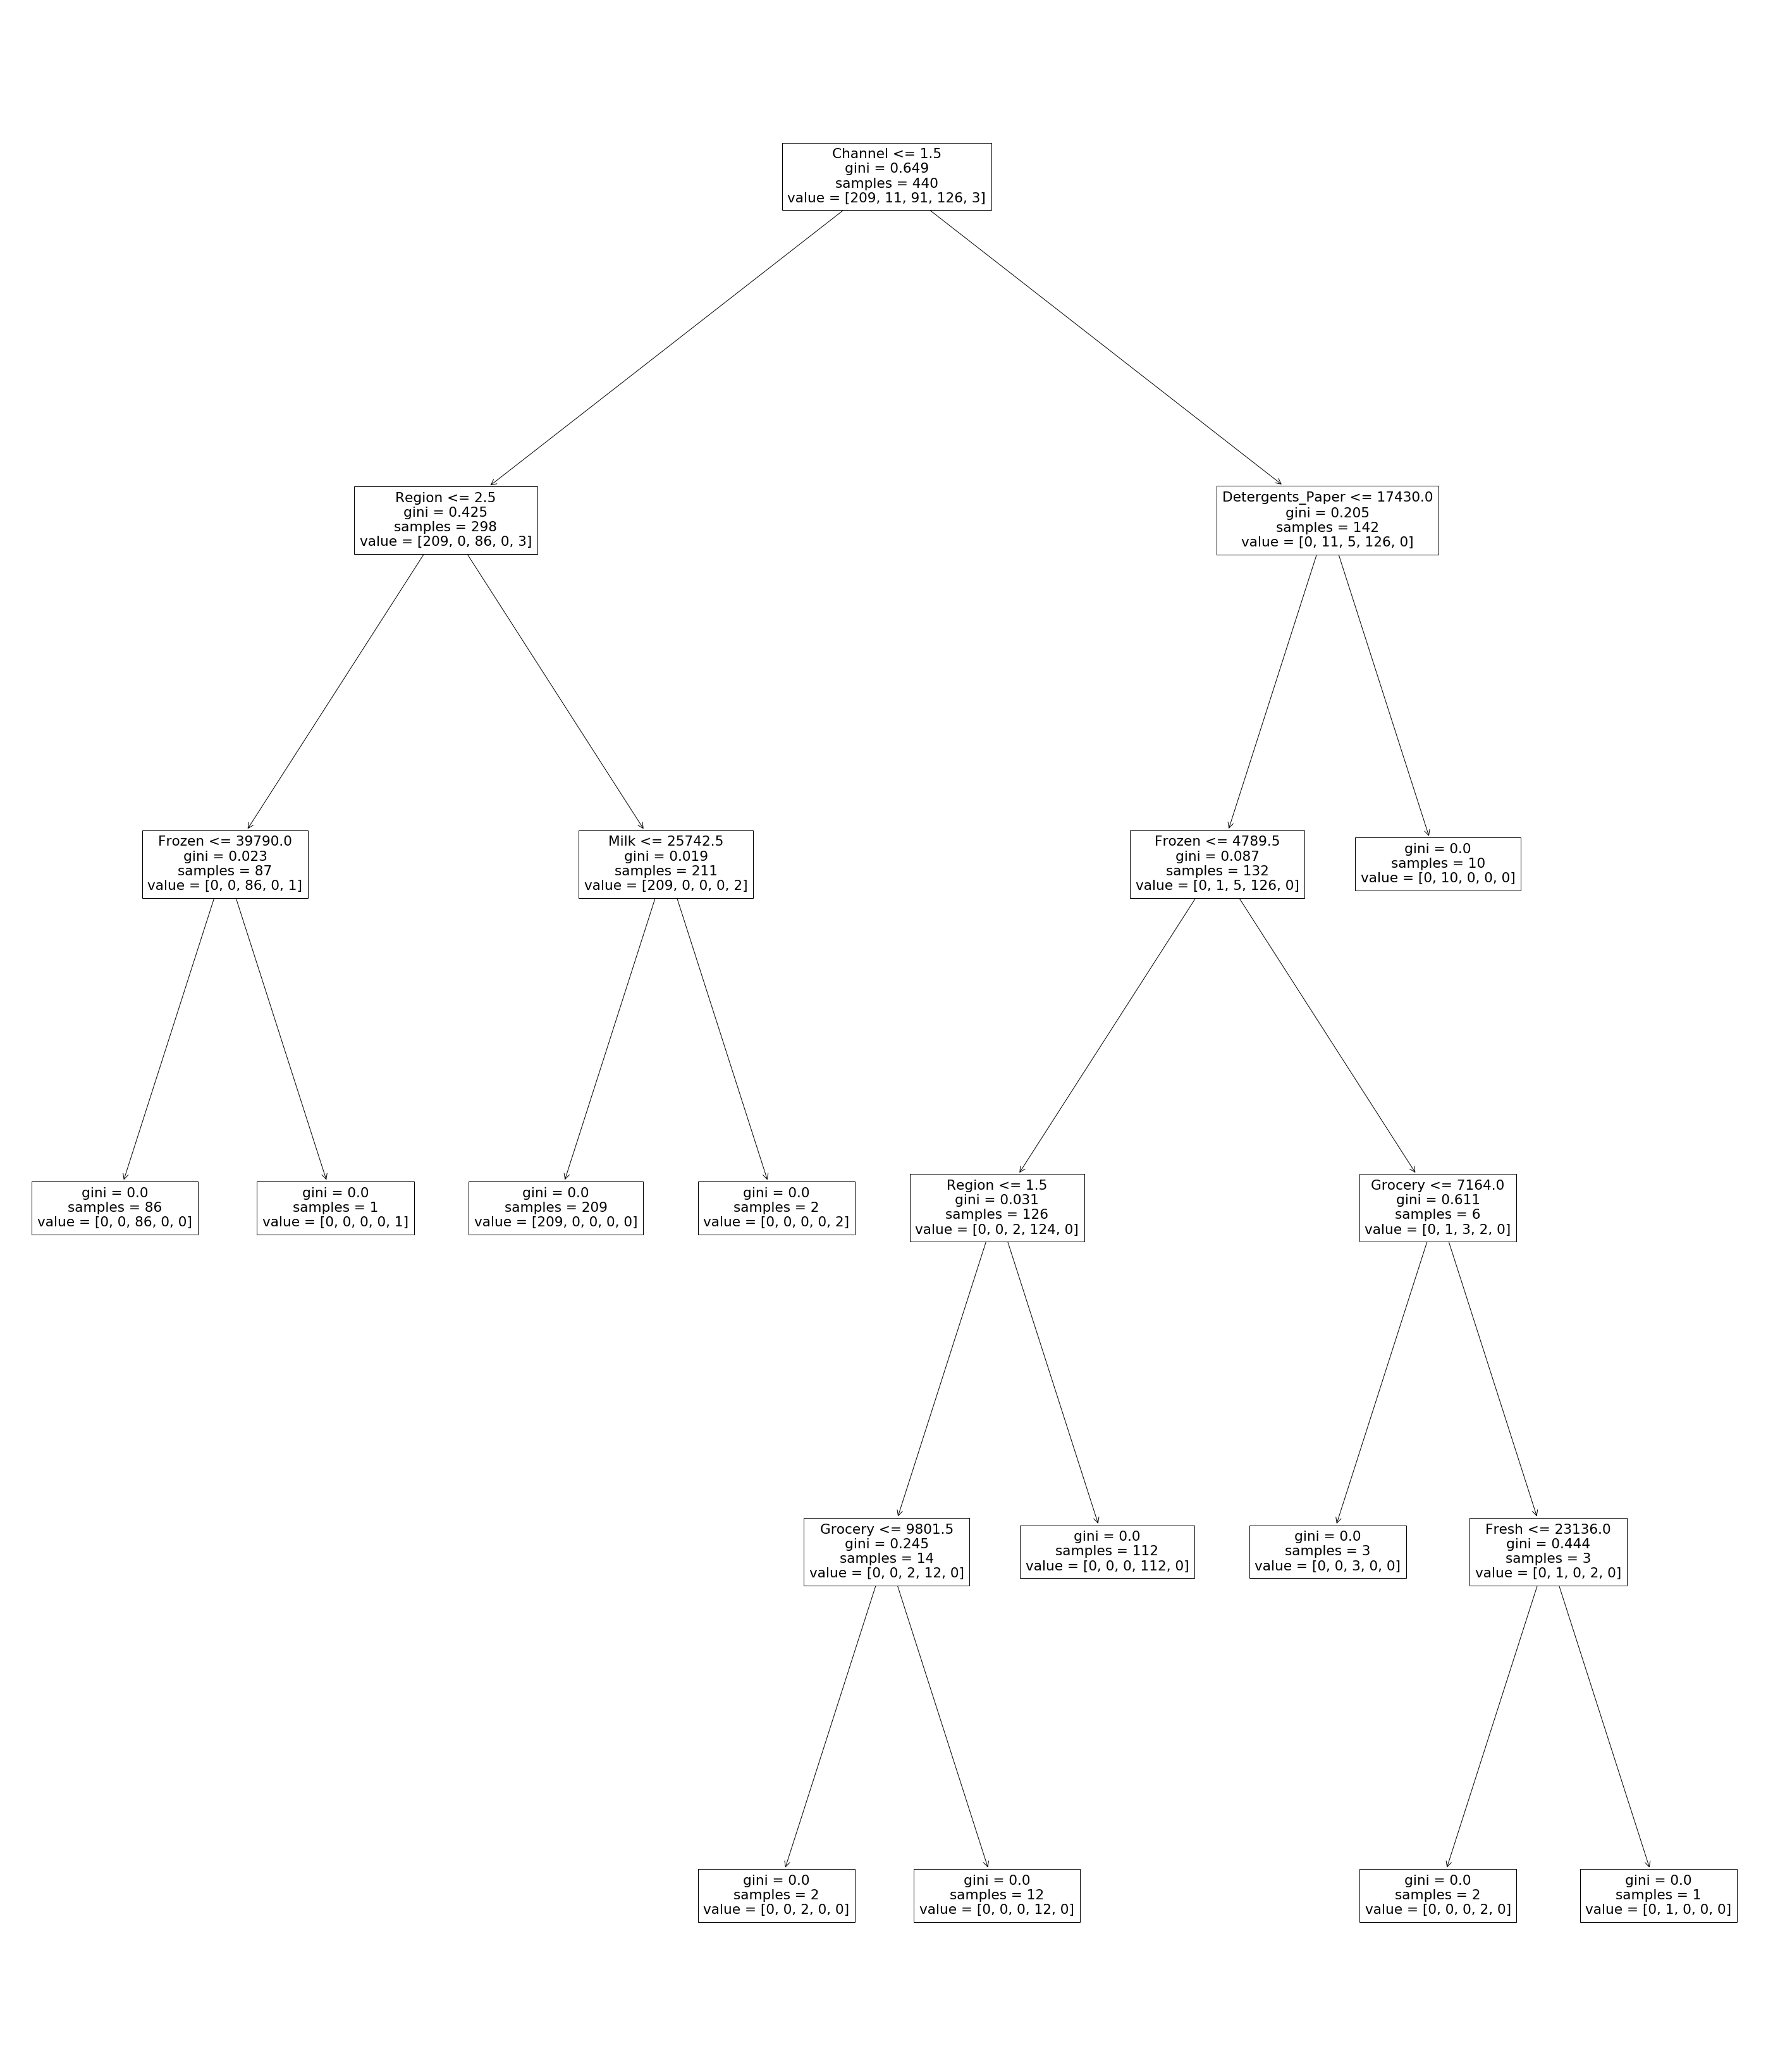

In [39]:
# Turn fitted model into tree visual
# Feature and threshold only apply to split nodes
plt.figure(figsize=(50, 60))
plot_tree(tr, feature_names=['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen'])
plt.show()